------
## Analysis on Netflix Userbase Using Python
------


<p align="center"><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQclUExX8LkEpICjzxODtPrh378KpnOrROy7w&usqp=CAU"></p>

---
# **Table of Contents**
---
1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Exploratory Data Analysis**](#Section8)<br>
8. [**Actionable Insights**](#Section91)</br>

## 1. Introduction

- 
Welcome to an immersive exploration of the Netflix user dataset, where we embark on a captivating journey to uncover profound insights about user demographics, consumption patterns, subscription preferences, and churn rate. Delving into this vast pool of data, we aim to reveal a treasure trove of knowledge that sheds light on the behaviors and preferences of Netflix's diverse user base. So, fasten your seatbelts as we embark on this enlightening adventure, venturing into the heart of Netflix's streaming world to discover the stories hidden within the numbers.

---
<a name = Section2></a>
# **2. Problem Statement**

- In this immersive exploration of the Netflix user dataset, our goal is to analyze and uncover profound insights about user demographics, consumption patterns, subscription preferences, and churn rate. By delving into this data, we aim to answer key questions about Netflix's diverse user base:

- 1.What are the demographics of Netflix users? How does age, gender, and geographical location impact their streaming preferences?
- 2.How do viewing patterns differ among various user segments (e.g., Laptop,smartphonr,TV and Tablet etc.)?
- 3.What factors contribute to subscription preferences? Are users more inclined towards specific plans or features?
- 4.What is the churn rate of Netflix users.

---
<a name = Section2></a>
# 3. Installing & Importing Libraries

In [137]:
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp 

---
<a name = Section4></a>
# **4. Data Acquisition & Description**

In [3]:
data =pd.read_excel('C:/Users/Abhishek/Downloads/Netflix Userbase.xlsx')

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
----

In [4]:
data.shape

(2500, 10)

In [7]:
data.head(3)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month


In [8]:
data.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


In [12]:
null_frame = pd.DataFrame(index=data.columns.values)
null_frame['Null Frequency']=data.isnull().sum().values
percent=data.isnull().sum().values/data.shape[0]
null_frame["Missing%"]=np.round(percent,decimals=4)*100
null_frame.transpose()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
Null Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

In [125]:
data['Duration Days']=data["Last Payment Date"]-data["Join Date"]

data['Join_month']=data['Join Date'].dt.month

In [39]:
data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration Days,Join_month
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511 days,1
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655 days,9
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119 days,2
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351 days,7
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58 days,5


---
<a name = Section8></a>
# **7. Exploratory Data Analysis**
---

- Through extensive data analysis, it can be observed that Netflix attracts subscribers from various age groups, cultural backgrounds, and geographic locations. This diversity is a result of Netflix's commitment to curating content that appeals to global audiences, as well as its investment in producing original series and films that feature diverse casts and stories

## 7.1 Distribution of Netflix subscription plans using a pie chart

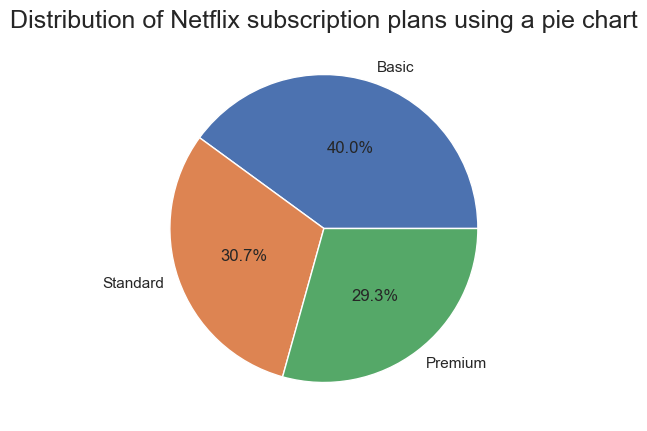

In [142]:
plt.pie(data["Subscription Type"].value_counts(),
                   labels=['Basic', 'Standard', 'Premium'],
                   autopct='%1.1f%%',pctdistance=0.55)
centre_circle = plt.Circle((100, 10000000), 50.90, fc='white')
fig.gca().add_artist(centre_circle)
fig = plt.gcf()
plt.title('Distribution of Netflix subscription plans using a pie chart',size=18)
plt.show()

- Observation: Netflix offers a range of subscription plans to cater to different customer preferences. The majority of customers opt for the Basic plan, indicating that a significant portion of the user base prefers access to the essential features at a lower cost.
----------

## 7.2 Total Revenue from Subscription Plans

<AxesSubplot:xlabel='Subscription Type', ylabel='Monthly Revenue'>

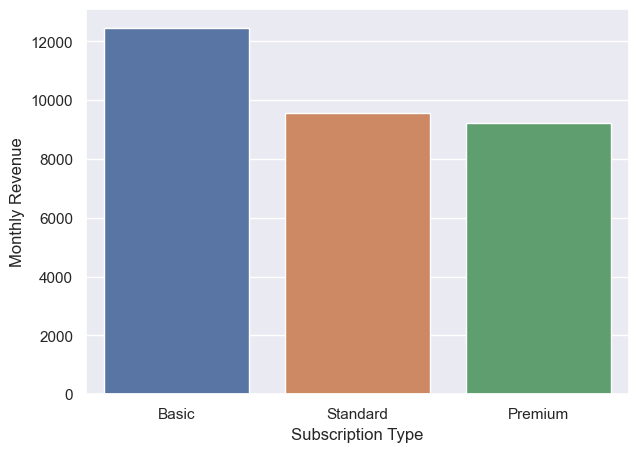

In [144]:
revenue = data.groupby(['Subscription Type'], as_index=False)['Monthly Revenue'].sum().sort_values(by='Monthly Revenue', ascending=False)

sns.barplot(x = 'Subscription Type',y= 'Monthly Revenue' ,data = revenue,)

- Observation: Among the various subscription plans offered by Netflix, the Basic plan seems to be the most profitable in terms of revenue generation.
----

## 7.3 Geo Analysis on User's by country and total revenue from each country.

In [188]:
import plotly.express as px

# Group the data by country and calculate the total number of users and total revenue from each country
country_data = data.groupby('Country').agg({'User ID': 'count', 'Monthly Revenue': 'sum'}).reset_index()

# Create a choropleth map showing the number of Netflix users in each country
fig1 = px.choropleth(country_data, locations='Country', locationmode='country names',
                     color='User ID', title='Number of Netflix Users by Country',
                     hover_name='Country', color_continuous_scale='Plasma')
fig1.show()
# Create a choropleth map showing the total revenue from each country
fig2 = px.choropleth(country_data, locations='Country', locationmode='country names',
                     color='Monthly Revenue', title='Total Netflix Revenue by Country',
                     hover_name='Country', color_continuous_scale='Plasma')
fig2.show()



## 7.4 Geographic Distribution of Netflix's users

Text(0.5, 1.0, 'Geographic Distribution of Netflix users')

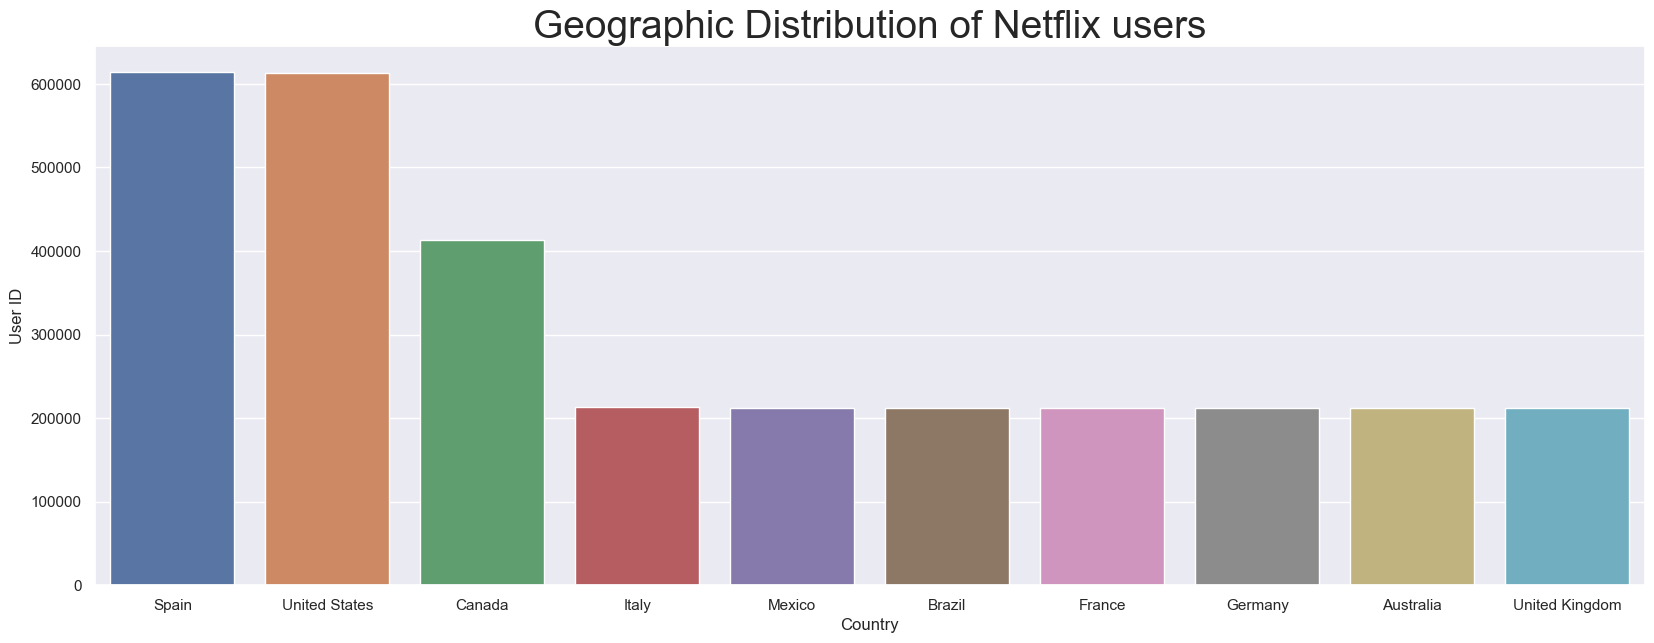

In [161]:
usercount_countary = data.groupby(['Country'], as_index=False)['User ID'].sum().sort_values(by='User ID', ascending=False)

sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(data = usercount_countary, x = 'Country',y= 'User ID')
plt.title('Geographic Distribution of Netflix users',size=28)

-Observation: Netflix's users are spread across several countries. The countries with the most users are the United States 🇺🇸, United Kingdom 🇬🇧, Canada 🇨🇦, and Australia 🇦🇺, among others. Netflix's wide geographic reach is a testament to its global appeal

---

## 7.5 Geographic Distribution of Netflix's users for each Subscription Type.

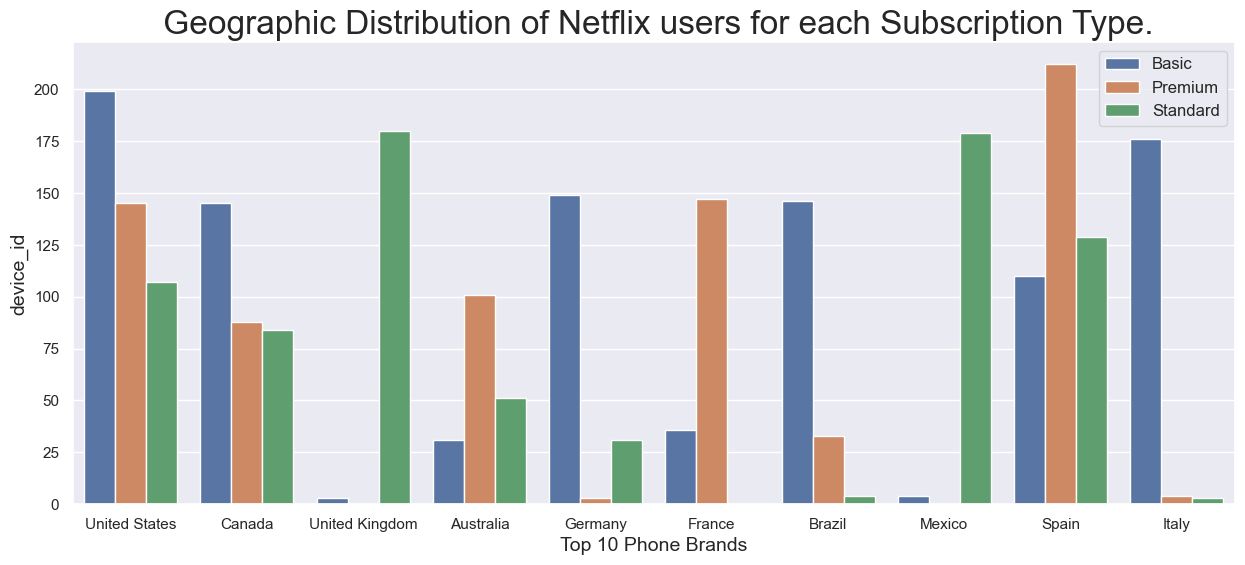

In [160]:
figure = plt.figure(figsize=[15,6])
sns.countplot(data=data, x="Country", hue="Subscription Type")

#plt.yticks(ticks=np.arange(0, 10,30), size=12)
plt.xlabel(xlabel='Top 10 Phone Brands', size=14)

plt.ylabel(ylabel='device_id', size=14)

plt.title(label=' Geographic Distribution of Netflix users for each Subscription Type.', size=24)
plt.legend(fontsize=12)



plt.show()

## 7.6 Device Usage Distribution

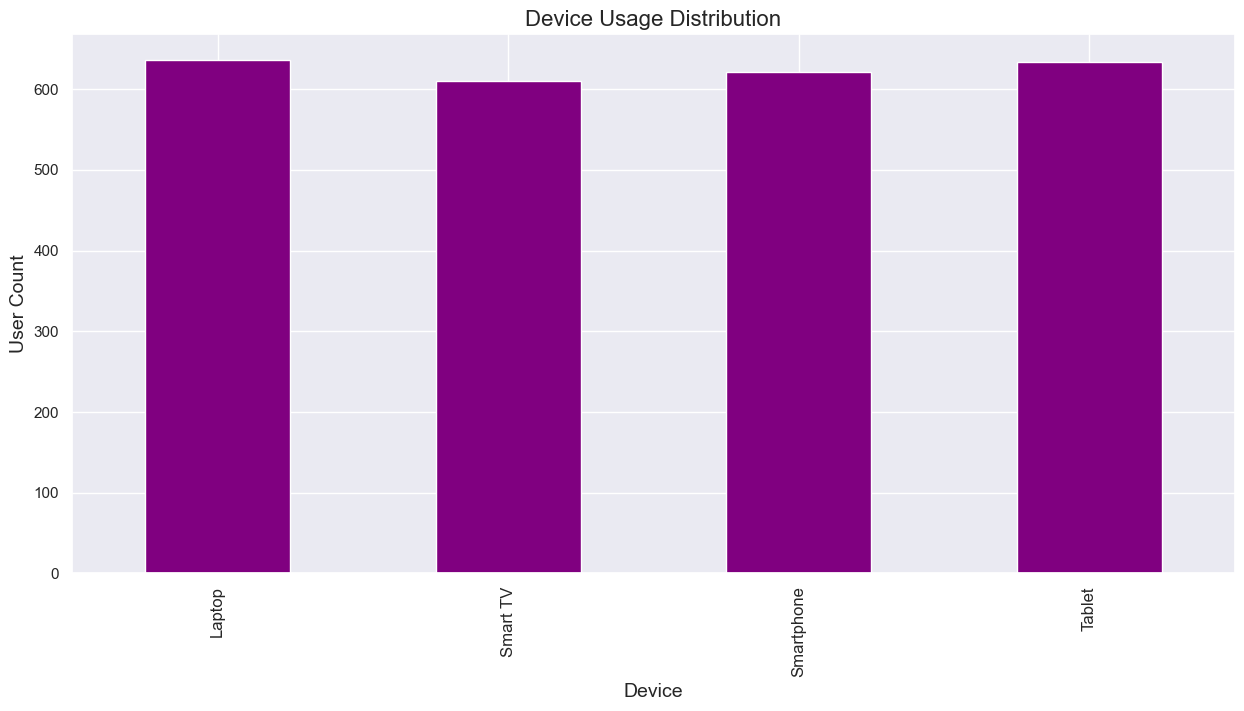

In [168]:
figure = plt.figure(figsize=[15, 7])
data.groupby(by=['Device'])['User ID'].count().plot.bar( color="Purple" )

plt.xticks(size=12, rotation=90)

plt.xlabel(xlabel='Device', size=14)
plt.ylabel(ylabel='User Count', size=14)
plt.title(label='Device Usage Distribution', size=16)

plt.show()

- Observation: The most popular device for consuming Netflix content is Laptop followed by smartphone, smart TV, and tablet . This tells us that a significant proportion of Netflix users prefer to consume content on mobile devices. This could be due to the flexibility and convenience offered by these devices.

## 7.7 Distribution of USER BASED ON Age & Gender

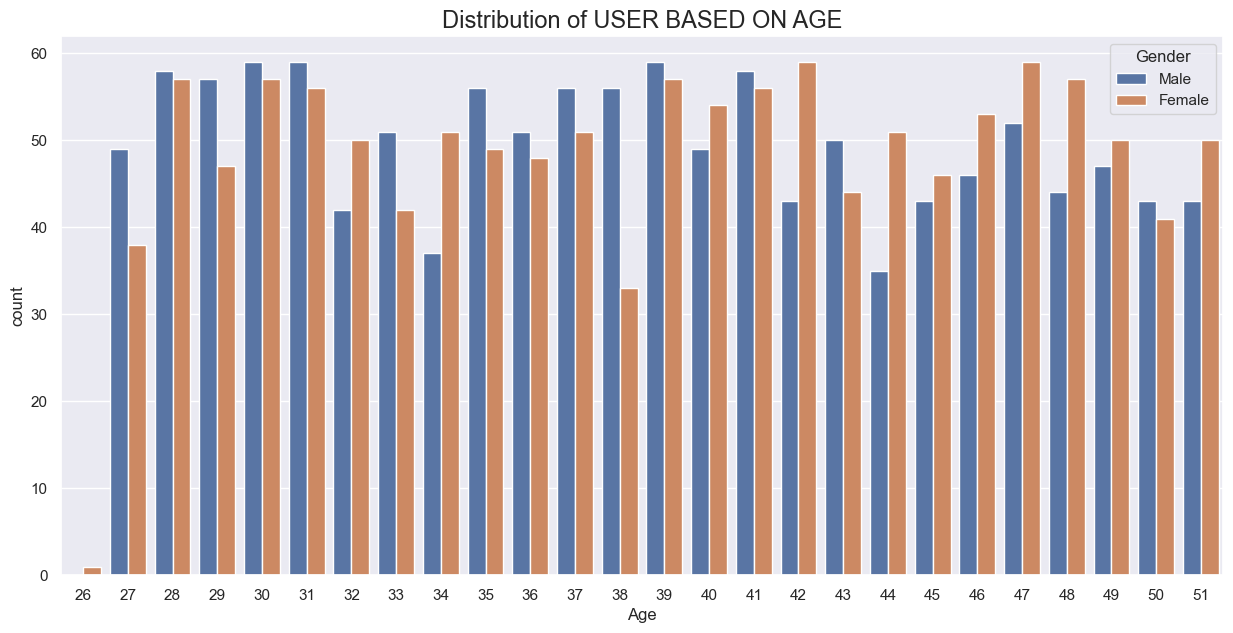

In [109]:
figure=plt.figure(figsize=[15,7])
sns.countplot(data=data, x="Age", hue="Gender")
plt.title("Distribution of USER BASED ON AGE",size=17)
plt.show()

- 
Observation: Netflix's user base is broadly diverse, with a slightly higher concentration in the 30-40 years age group. The gender distribution is nearly even

## 7.8 User Growth and Revenue

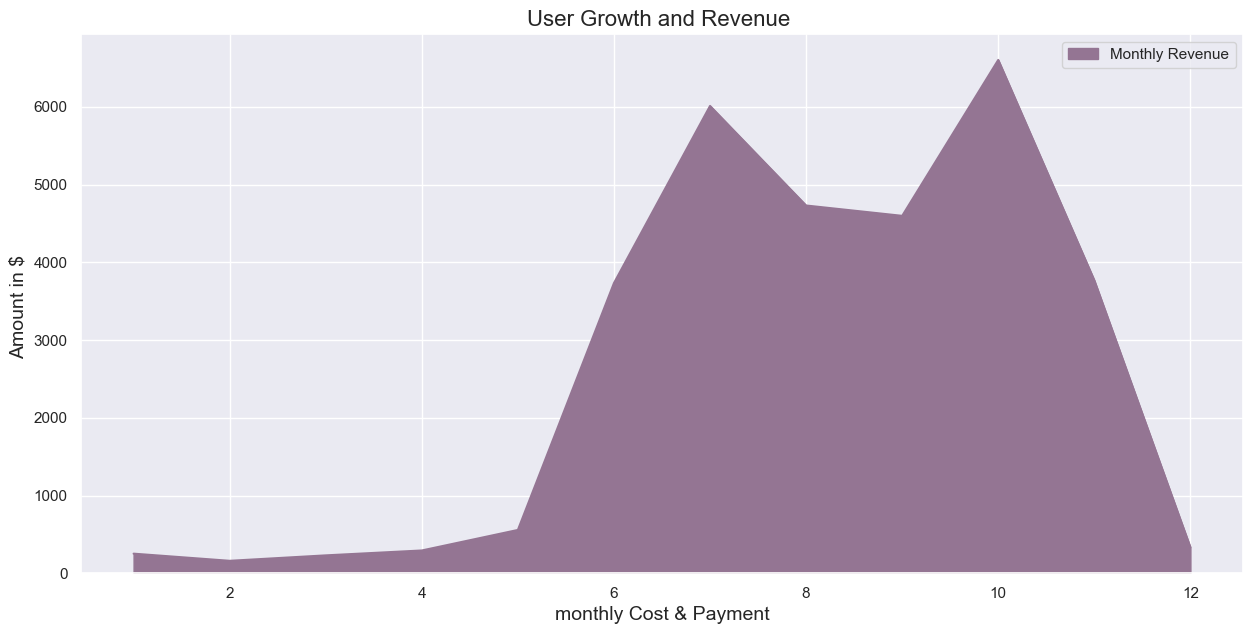

In [173]:
Figure = plt.figure(figsize=[15, 7])
data.groupby(by=['Join_month'])['Monthly Revenue'].sum().plot.area(color='#947593')


plt.xlabel(xlabel='monthly Cost & Payment', size=14)
plt.ylabel(ylabel='Amount in $ ', size=14)
plt.title(label='User Growth and Revenue ', size=16)
plt.legend()
plt.show()

- Increased Number of Users: The number of users has increased from July to December. This suggests that the business or platform has experienced growth in its user base during the July -december period.
- The observation also states that the revenue is high during the same time frame (July to December)

----

## 8 Actionable Insights

- Age Distribution :
The age distribution of Netflix users spans a wide range, with a prominent presence in the 30-40 age group, along with substantial representation in the 20-30 and 40-50 age brackets. This indicates that Netflix's content appeals to a diverse audience, which bodes well for the company's ability to maintain a broad and varied user base.

- Netflix boasts a well-balanced gender distribution among its users, suggesting that the platform's content is equally appealing to both males and females.

- Netflix's global appeal is evident through its widespread user base, encompassing numerous countries such as the United States 🇺🇸, United Kingdom 🇬🇧, Canada 🇨🇦, Australia 🇦🇺, and more. This demonstrates the platform's extensive geographic distribution

- The most popular device for consuming Netflix content is Laptop followed by smartphone, smart TV, and tablet . This tells us that a significant proportion of Netflix users prefer to consume content on mobile devices. This could be due to the flexibility and convenience offered by these devices.

- Among the various subscription plans offered by Netflix, the Basic plan seems to be the most profitable in terms of revenue generation.




Kindly reach out to me at abhishekrcks1995@gmail.com

For feedback or questions, feel free.

Want to connect with me? Check out these links:📣

👉LinkedIn: https://www.linkedin.com/in/abhishek-thakur-217638145/

👉Github: https://github.com/Abhishek14011995

👉Complete Workbook & Data file: https://github.com/Abhishek14011995/Diwali-Sales-Analysis-Using-Python